In [2]:
!pip install utils
!pip install basemap

In [32]:
!pip install xgboost

     ---------------------------------------- 89.1/89.1 MB 3.5 MB/s eta 0:00:00


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from glob import glob
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import *
from tensorflow.keras import Sequential
from utils import * 
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import csv

In [4]:
df1 = pd.read_csv('temp.csv')
df2 = pd.read_csv('prec.csv')
df3 = pd.read_csv('rh.csv')
df_C = pd.read_csv('GEDEvent_v22_1.csv')

In [5]:
fig = px.scatter_geo(df_C, lat="lat", lon = "long", color="country",
                     hover_name="country", size="fatalities",
                     projection="natural earth")

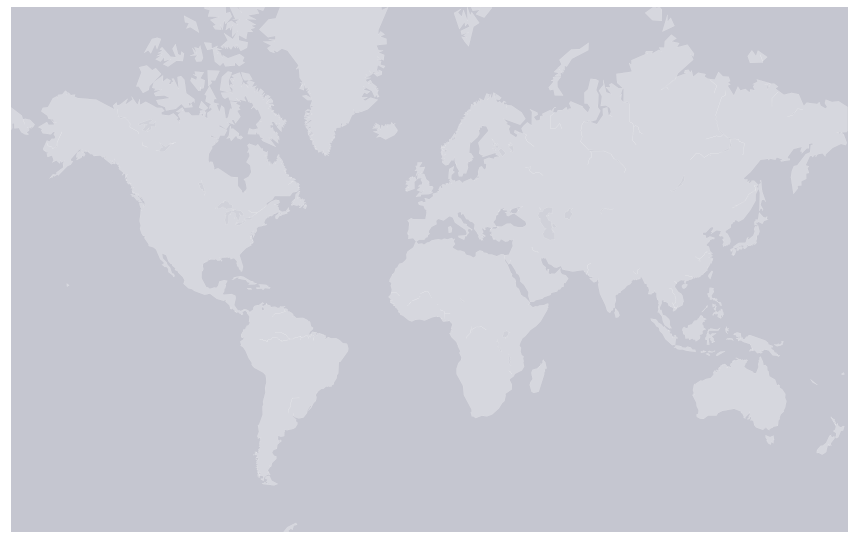

In [10]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
 
plt.rcParams["figure.figsize"]=15,10;

m=Basemap(llcrnrlon=-180, llcrnrlat=-65, urcrnrlon=180, urcrnrlat=80, projection='merc');
m.drawmapboundary(fill_color='#C5C6D0', linewidth=0);
m.fillcontinents(color='white', alpha=0.3);
m.drawcoastlines(linewidth=0.1, color="white");

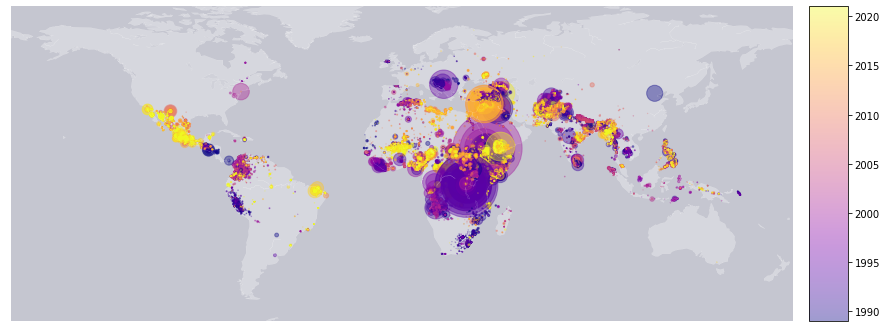

In [12]:
m=Basemap(llcrnrlon=-180, llcrnrlat=-65, urcrnrlon=180, urcrnrlat=80)
m.drawmapboundary(fill_color='#C5C6D0', linewidth=0)
m.fillcontinents(color='white', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")

df_C['labels_enc'] = pd.factorize(df_C['fatalities'])[0]

m.scatter(
    x=df_C['long'], 
    y=df_C['lat'], 
    s=df_C['fatalities']/10, 
    alpha=0.4, 
    c=df_C['year'], 
    cmap="plasma",
)
m.colorbar()

Text(0.5, 1.0, 'Temperature v/s Fatalities')

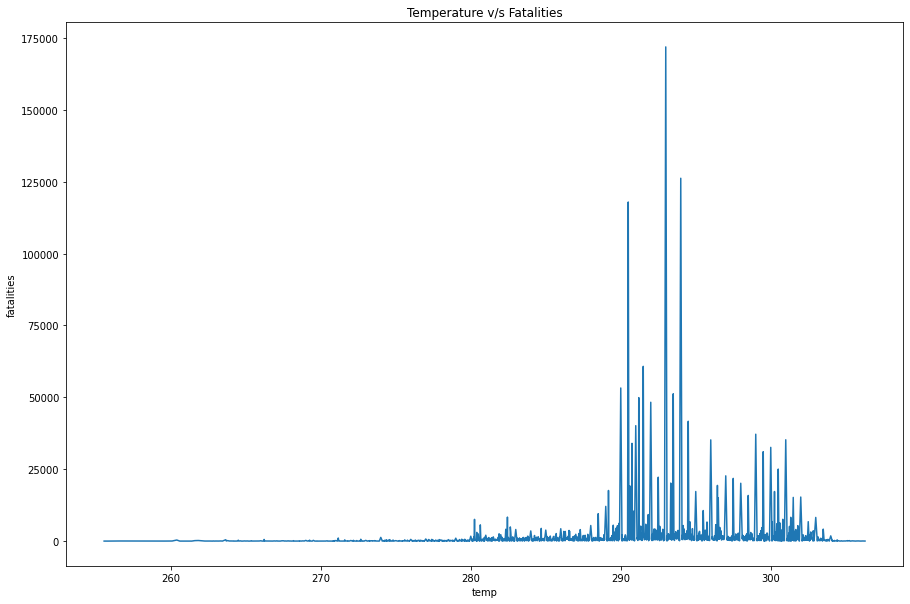

In [13]:
plt.plot(df1['temp'],df1['fatalities'])
plt.xlabel('temp')
plt.ylabel('fatalities')
plt.title('Temperature v/s Fatalities')

Text(0.5, 1.0, 'Precipitation v/s Fatalities')

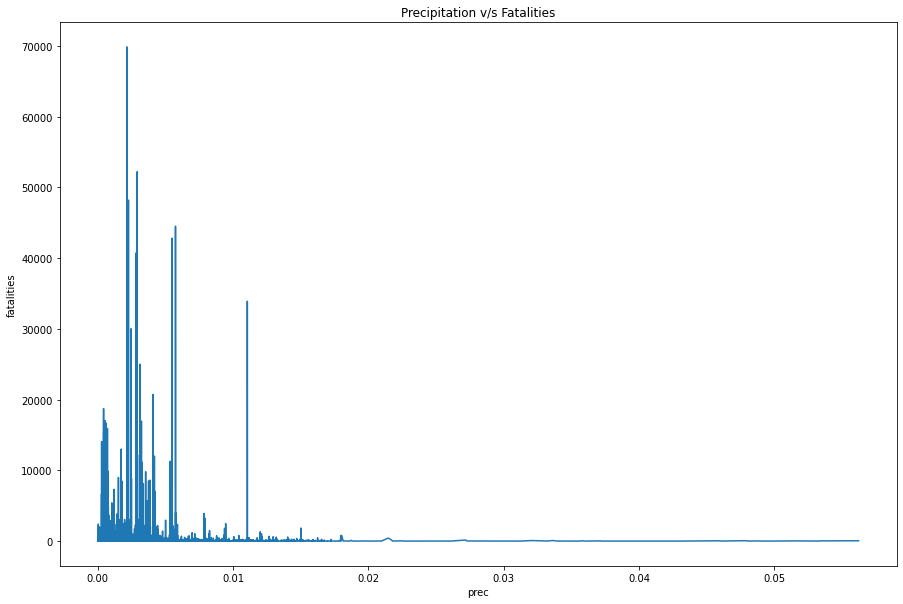

In [14]:
plt.plot(df2['prec'],df2['fatalities'])
plt.xlabel('prec')
plt.ylabel('fatalities')
plt.title('Precipitation v/s Fatalities')

Text(0.5, 1.0, 'Relative Humidity v/s Fatalities')

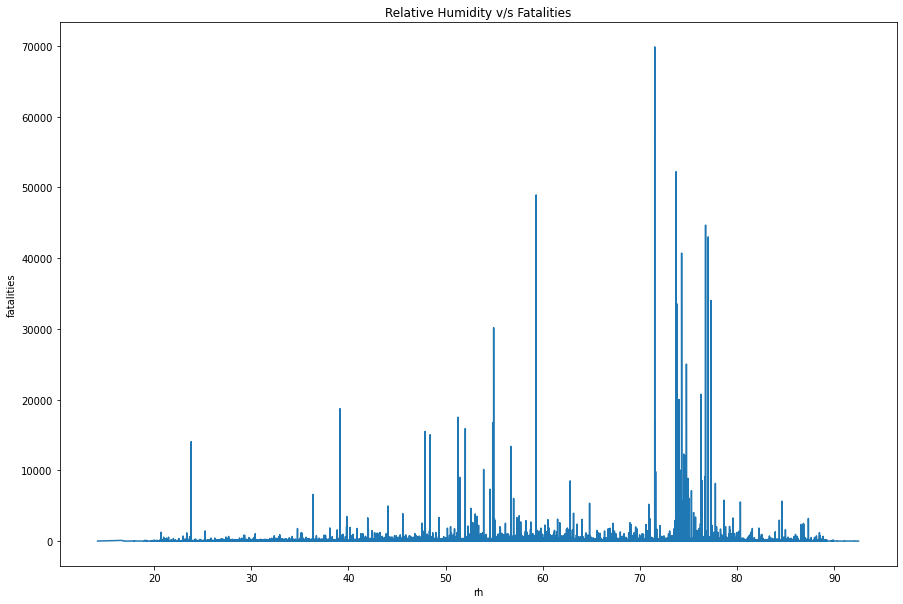

In [15]:
plt.plot(df3['rh'],df3['fatalities'])
plt.xlabel('rh')
plt.ylabel('fatalities')
plt.title('Relative Humidity v/s Fatalities')

In [16]:
df = pd.concat([df1,df2,df3])

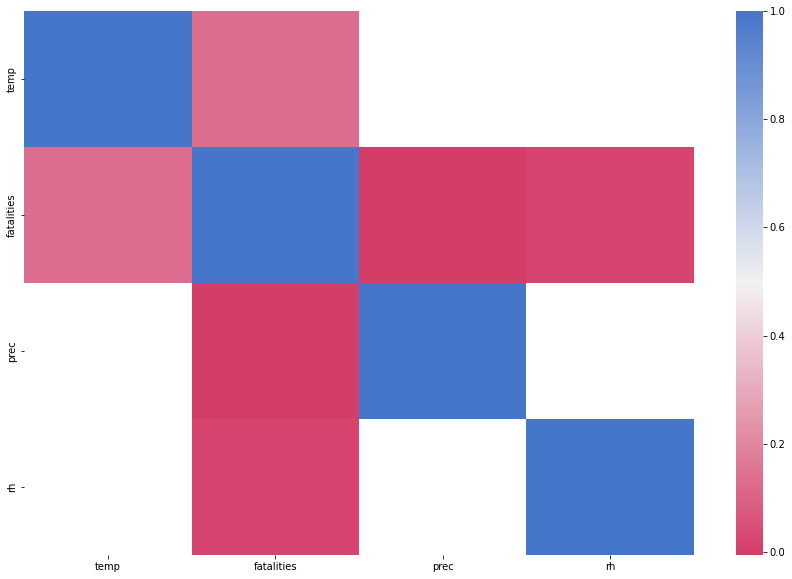

In [17]:
cmap = sns.diverging_palette(0, 255, as_cmap=True)
sns.heatmap(df.corr(), cmap=cmap)
plt.show()

In [18]:
df

,temp,fatalities,prec,rh
0,255.555556,4.0,NaN,NaN
1,255.800000,2.0,NaN,NaN
2,256.600000,35.0,NaN,NaN
3,258.200000,3.0,NaN,NaN
4,258.600000,9.0,NaN,NaN
...,...,...,...,...
20392,NaN,2.0,NaN,92.166667
20393,NaN,0.0,NaN,92.177778
20394,NaN,7.0,NaN,92.200000
20395,NaN,2.0,NaN,92.370000


In [19]:
import pandas as pd

X1 = pd.DataFrame(df['temp']).fillna(np.mean(df['temp']))
X2 = pd.DataFrame(df['prec']).fillna(np.mean(df['prec']))
X3 = pd.DataFrame(df['rh']).fillna(np.mean(df['rh']))
y = pd.DataFrame(df['fatalities'])


X = np.column_stack((X1, X2, X3))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


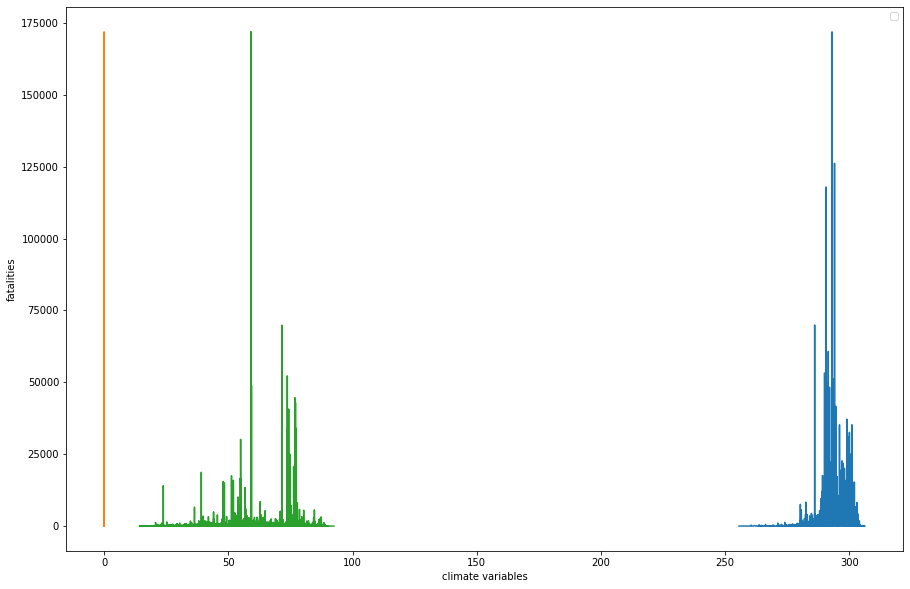

In [20]:
plt.plot(X,y)
plt.ylabel('fatalities')
plt.xlabel('climate variables')
plt.legend()

In [21]:
from scipy.signal import lfilter

n = 10
b = [1.0 / n] * n
a = 1
yy = lfilter(b, a, df['fatalities'])

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, yy, test_size = 0.2, random_state = 28)
sc_x = StandardScaler()
sc_y = StandardScaler()

X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)
X = sc_x.fit_transform(X)
y_train = sc_y.fit_transform(y_train.reshape(-1,1))
y_test = sc_y.fit_transform(y_test.reshape(-1,1))
y = sc_y.fit_transform(yy.reshape(-1,1))

Text(0.5, 0, 'climate variables')

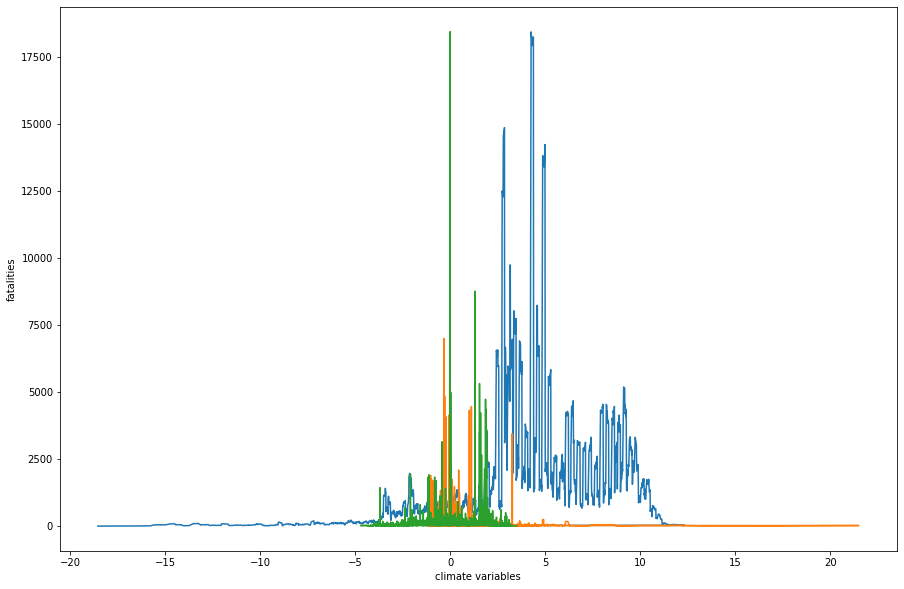

In [23]:
plt.plot(X,yy)
plt.ylabel('fatalities')
plt.xlabel('climate variables')

Linear Regression

[[-5.38759634]
 [-5.34435422]
 [-5.20283457]
 ...
 [ 0.06787067]
 [ 0.06821913]
 [ 0.06848561]]
R2 =  0.08477341502309022
mse = 0.9152265849769103
rmse =  0.956674754018789


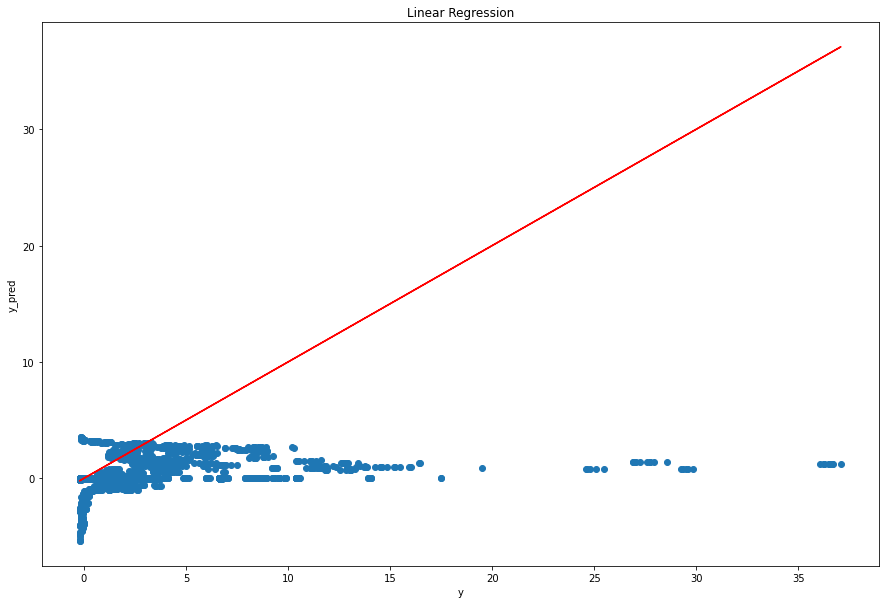

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(y_pred)
r_sq = model.score(X, y)
print('R2 = ', r_sq)
mse = mean_squared_error(y_pred, y)
print('mse =',mse)
print('rmse = ',np.sqrt(mse))

plt.scatter(y, y_pred)
plt.plot(y, y, color ='red')
plt.xlabel('y')
plt.ylabel('y_pred')
plt.title('Linear Regression')
plt.show()

Polynomial Regression

In [25]:
from sklearn.preprocessing import PolynomialFeatures

degree=2

poly_model = PolynomialFeatures(degree=degree)

poly_x_values = poly_model.fit_transform(X)

In [26]:
poly_model.fit(poly_x_values, y)

regression_model = LinearRegression()

regression_model.fit(poly_x_values, y)

y_pred = regression_model.predict(poly_x_values)

regression_model.coef_

mean_squared_error(y, y_pred, squared=False)

0.9276447026716587

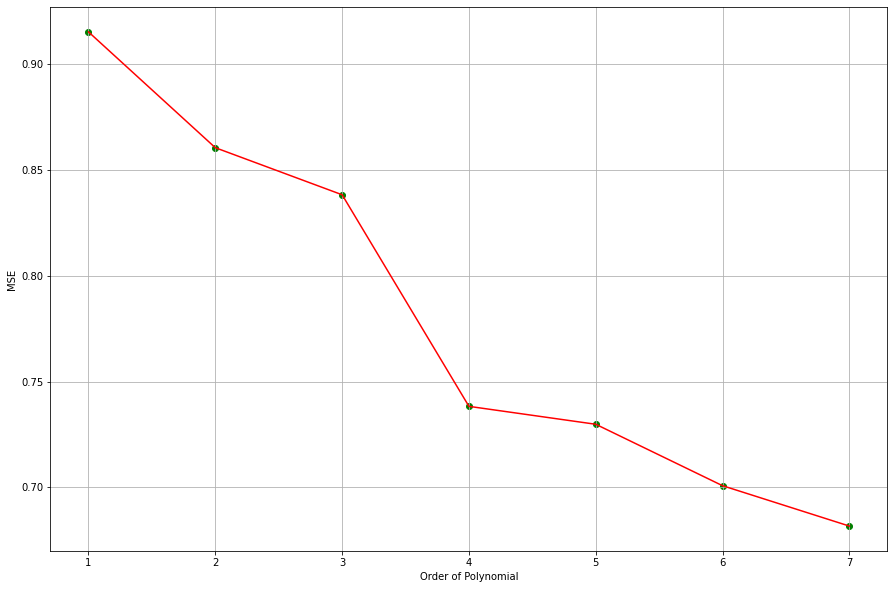

In [27]:
number_degrees = [1,2,3,4,5,6,7]
plt_mean_squared_error = []
for degree in number_degrees:

   poly_model = PolynomialFeatures(degree=degree)
   poly_x_values = poly_model.fit_transform(X)
   poly_model.fit(poly_x_values, y)
   regression_model = LinearRegression()
   regression_model.fit(poly_x_values, y)
   y_pred = regression_model.predict(poly_x_values)
   plt_mean_squared_error.append(mean_squared_error(y, y_pred))
  
plt.scatter(number_degrees,plt_mean_squared_error, color="green")
plt.plot(number_degrees,plt_mean_squared_error, color="red") 
plt.xlabel('Order of Polynomial')
plt.ylabel('MSE')
plt.grid()

[[-0.87371679]
 [-0.36905965]
 [ 0.74602264]
 ...
 [ 0.45763202]
 [ 0.51750978]
 [ 0.56567099]]
R2 =  0.3182365555650978
mse =  0.6817634444349027
rmse =  0.825689678047935


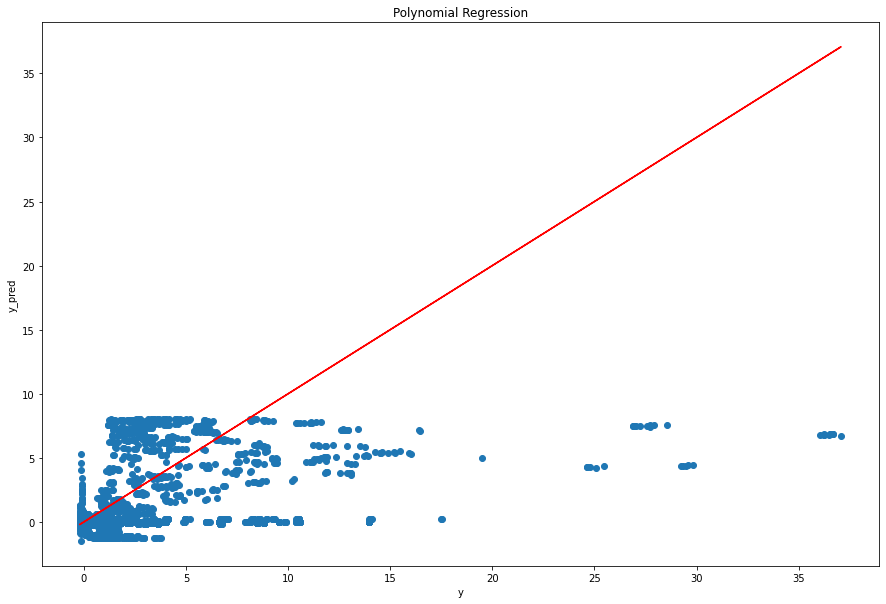

In [28]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


poly = PolynomialFeatures(degree=7)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)
print(y_pred)
mean_squared_error(y_pred, y)
r_sq = model.score(X_poly,y)
mse = mean_squared_error(y, y_pred)
print('R2 = ',r_sq)
print('mse = ',mse)
print('rmse = ',np.sqrt(mse))

plt.scatter(y, y_pred)
plt.plot(y, y, color ='red')
plt.xlabel('y')
plt.ylabel('y_pred')
plt.title('Polynomial Regression')
plt.show()

Random Forest Regression

C:\Users\anish\AppData\Local\Temp\ipykernel_18444\3410025514.py:8: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



R2 =  0.835264883607159
mse =  0.1864824308365166
rmse =  0.4318361157158079


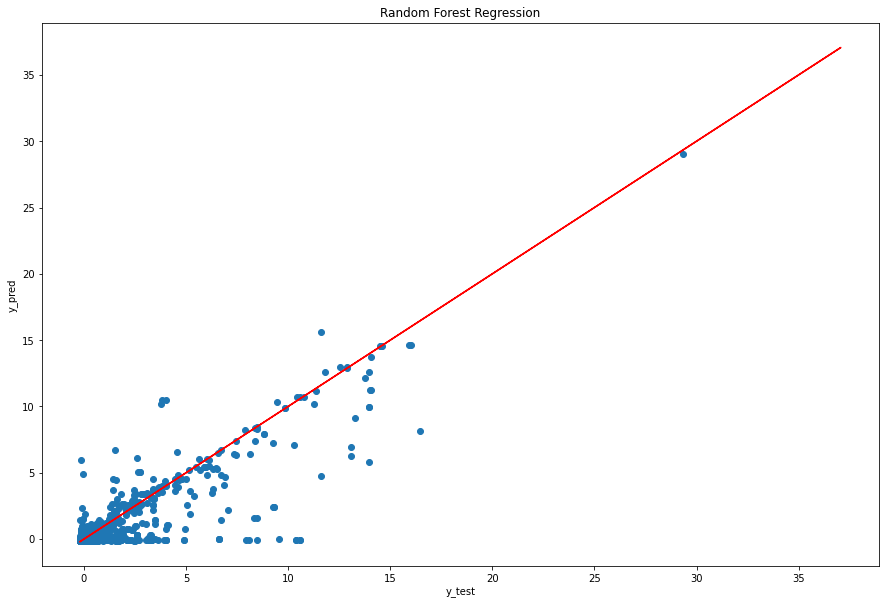

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 18)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
score = model.score(X_test, y_test)
mean_squared_error(y_pred,y_test)

r_sq = model.score(X, y)
print('R2 = ',r_sq)
mse = mean_squared_error(y_pred, y_test)
print('mse = ',mse)
print('rmse = ',np.sqrt(mse))

plt.scatter(y_test, y_pred)
plt.plot(y, y, color ='red')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Random Forest Regression')
plt.show()

Decision Tree Regression

[-0.0463052  -0.11814617 -0.09070543 ... -0.04975803 -0.09070543
 -0.11331618]
R2 =  0.8328456717225065
mse =  0.19899499630379688
rmse =  0.446


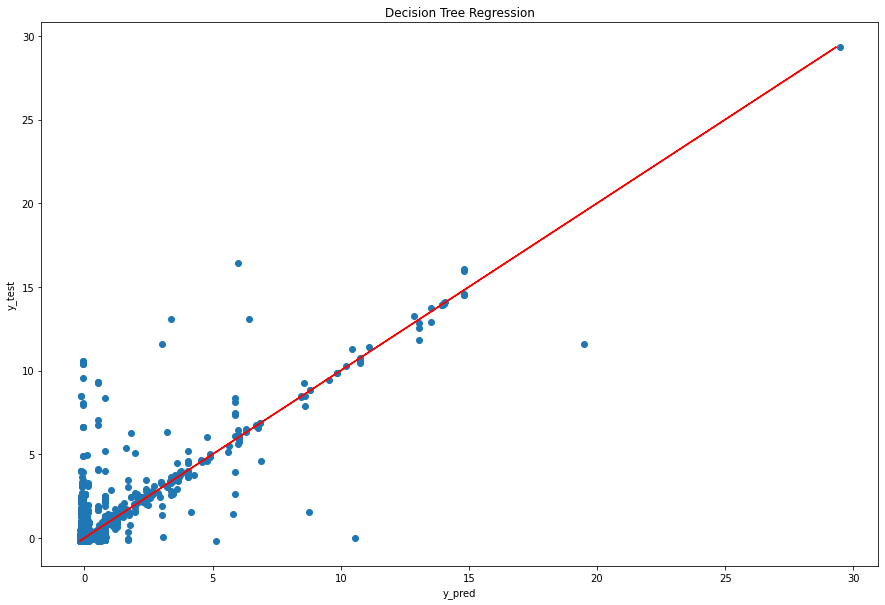

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

model = DecisionTreeRegressor(max_depth=10, random_state = 30)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)
r_sq = model.score(X, y)
mse = mean_squared_error(y_pred, y_test)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
print('R2 = ',r_sq)
print('mse = ',mse)
print('rmse = ',rmse)

plt.scatter(y_pred, y_test)
plt.plot(y_test, y_test, color ='red')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title('Decision Tree Regression')
plt.show()

XGBoost

[21:13:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[21:13:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[0]	test-rmse:0.51832
[1]	test-rmse:0.45081
[2]	test-rmse:0.41419
[3]	test-rmse:0.36149
[4]	test-rmse:0.34547
[5]	test-rmse:0.34425
[6]	test-rmse:0.34320
[7]	test-rmse:0.33686
[8]	test-rmse:0.32898
[9]	test-rmse:0.32798
R2 =  0.8328456717225065
mse =  0.10756806042921813
rmse =  0.32797570097374307


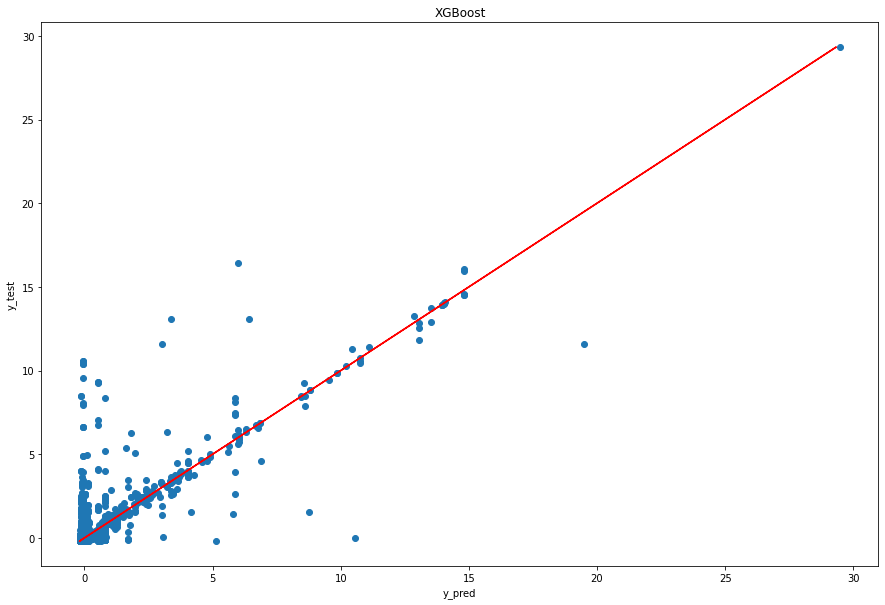

In [47]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'max_depth': 10,
    'eta': 0.8,
    'n_estimators':10,
    'objective': 'reg:linear',
    'eval_metric': 'rmse'
}

model = xgb.train(params, dtrain, num_boost_round=10, evals=[(dtest, 'test')])
predictions = model.predict(dtest)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print('R2 = ',r_sq)
print('mse = ',mse)
print('rmse = ',np.sqrt(mse))

plt.scatter(y_pred, y_test)
plt.plot(y_test, y_test, color ='red')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title('XGBoost')
plt.show()

Neural Network

In [48]:
import tensorflow as tf
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV


def create_model(num_units=100, learning_rate=0.001):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_units, input_shape=(3,), activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
    return model

model = KerasRegressor(build_fn=create_model, epochs=10, batch_size=20)

param_grid = {
    'num_units': [8, 16, 32],
    'learning_rate': [0.001, 0.01, 0.1]
}


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

model.fit(X_train, y_train, epochs=10, batch_size = 20)


predictions = model.predict(X_test)
mean_squared_error(predictions, y_test)

C:\Users\anish\AppData\Local\Temp\ipykernel_18444\2334105646.py:14: DeprecationWarning:

KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.



Epoch 1/10
2970/2970 [==============================] - 3s 920us/step - loss: 0.8423
Epoch 2/10
2970/2970 [==============================] - 3s 944us/step - loss: 0.7825
Epoch 3/10
2970/2970 [==============================] - 3s 847us/step - loss: 0.7223
Epoch 4/10
2970/2970 [==============================] - 3s 927us/step - loss: 0.6806
Epoch 5/10
2970/2970 [==============================] - 3s 847us/step - loss: 0.6625
Epoch 6/10
2970/2970 [==============================] - 3s 900us/step - loss: 0.6566
Epoch 7/10
2970/2970 [==============================] - 3s 899us/step - loss: 0.6492
Epoch 8/10
2970/2970 [==============================] - 3s 895us/step - loss: 0.6500
Epoch 9/10
2970/2970 [==============================] - 3s 935us/step - loss: 0.6454
Epoch 10/10
743/743 [==============================] - 1s 820us/step


0.4610872511849474

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(10, input_shape=(3,), activation='relu'),
    Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=15, batch_size = 15)

predictions = model.predict(X_test)
mse = mean_squared_error(predictions, y_test)

print('mse = ', mse)

Epoch 1/15
3959/3959 [==============================] - 4s 885us/step - loss: 0.9475
Epoch 2/15
3959/3959 [==============================] - 3s 880us/step - loss: 0.8450
Epoch 3/15
3959/3959 [==============================] - 3s 869us/step - loss: 0.8313
Epoch 4/15
3959/3959 [==============================] - 3s 883us/step - loss: 0.8085
Epoch 5/15
3959/3959 [==============================] - 4s 885us/step - loss: 0.7868
Epoch 6/15
3959/3959 [==============================] - 3s 879us/step - loss: 0.7626
Epoch 7/15
3959/3959 [==============================] - 3s 878us/step - loss: 0.7383
Epoch 8/15
3959/3959 [==============================] - 4s 891us/step - loss: 0.7167
Epoch 9/15
3959/3959 [==============================] - 3s 878us/step - loss: 0.6949
Epoch 10/15
3959/3959 [==============================] - 3s 879us/step - loss: 0.6819
Epoch 11/15
3959/3959 [==============================] - 4s 884us/step - loss: 0.6704
Epoch 12/15
3959/3959 [==============================] - 4s 884

R2 =  0.4011495599931004
rmse =  0.6788245354932217


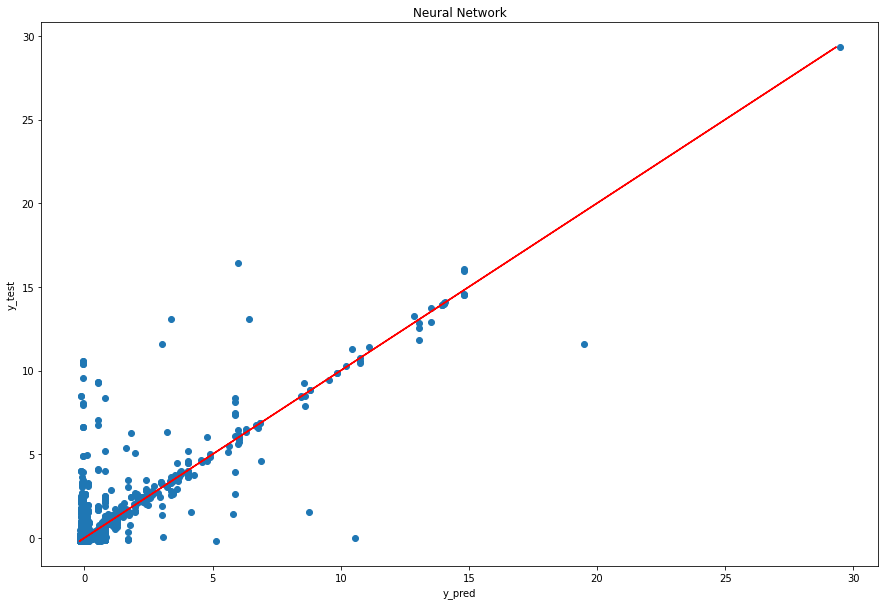

In [50]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)

print('R2 = ',r2)
print('rmse = ',np.sqrt(mse))

plt.scatter(y_pred, y_test)
plt.plot(y_test, y_test, color ='red')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title('Neural Network')
plt.show()

Other Methods

In [ ]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score

models = [
    SVR(),
    LinearRegression(),
    Lasso(),
    Ridge(),
    ElasticNet(),
    KNeighborsRegressor(),
    MLPRegressor()
]

for model in models:
  scores = cross_val_score(model, X, y, cv=5)
  print(f"{model.__class__.__name__}: {scores.mean():.2f} +/- {scores.std():.2f}")
